Resumo do Dataset:
    ID_Cliente  Idade     Gênero          Cidade        Estado     Produto  \
0         101     57   Feminino  Belo Horizonte  Minas Gerais  Assinatura   
1         101     57   Feminino  Belo Horizonte  Minas Gerais     Jaqueta   
2         101     57   Feminino  Belo Horizonte  Minas Gerais        Meia   
3         102     64  Masculino  Belo Horizonte  Minas Gerais        Boné   
4         102     64  Masculino  Belo Horizonte  Minas Gerais    Carteira   

    Valor Data_Compra  Avaliacao Pagamento  
0  239.36  2023-04-17    Péssimo   Crédito  
1  135.57  2023-12-02     Neutra       Pix  
2  343.81  2023-03-02  Excelente       Pix  
3  355.78  2023-07-07       Ruim       Pix  
4  348.23  2023-11-08     Neutra   Crédito  

Informações Gerais:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3305 entries, 0 to 3304
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_Cliente   3305 non-null   

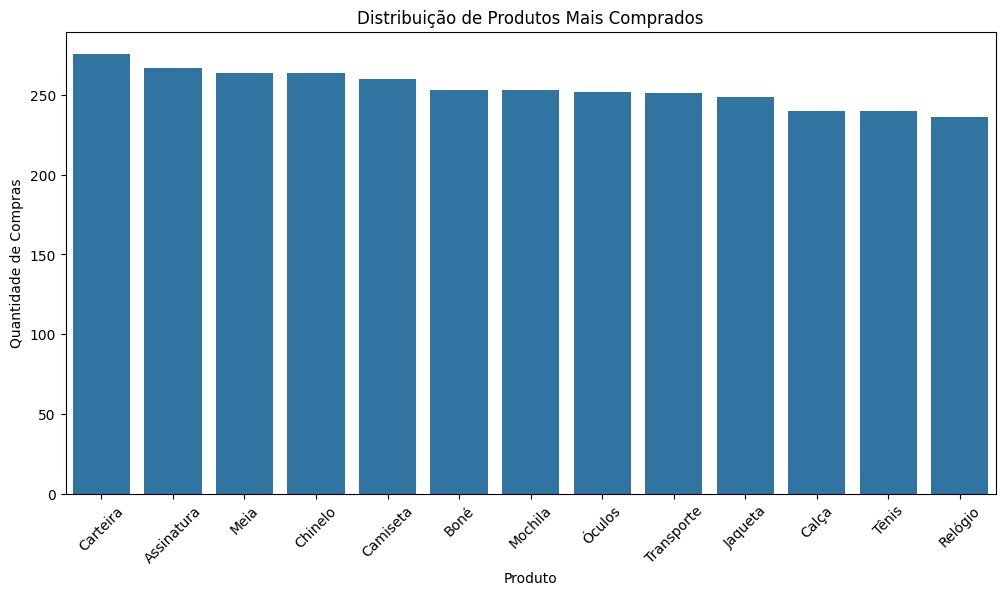

<ipython-input-3-fddb070d5a90>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Avaliacao', palette="viridis")


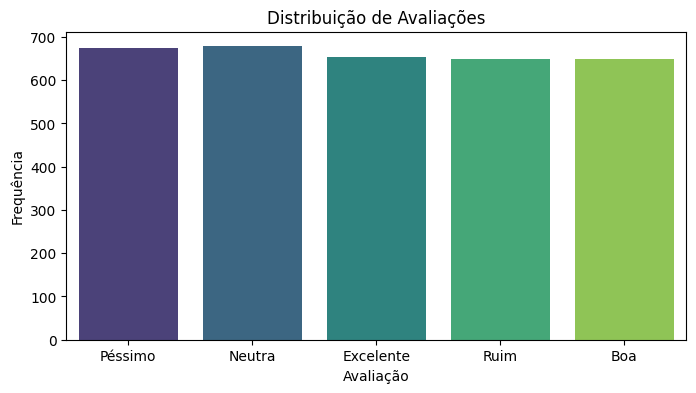

<ipython-input-3-fddb070d5a90>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Pagamento', palette="muted", order=dataset['Pagamento'].value_counts().index)


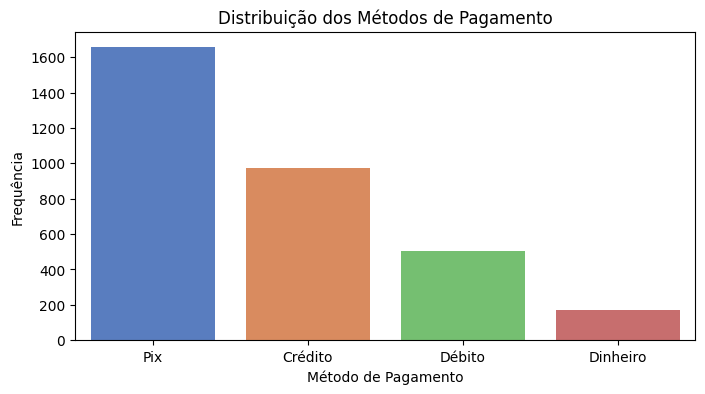

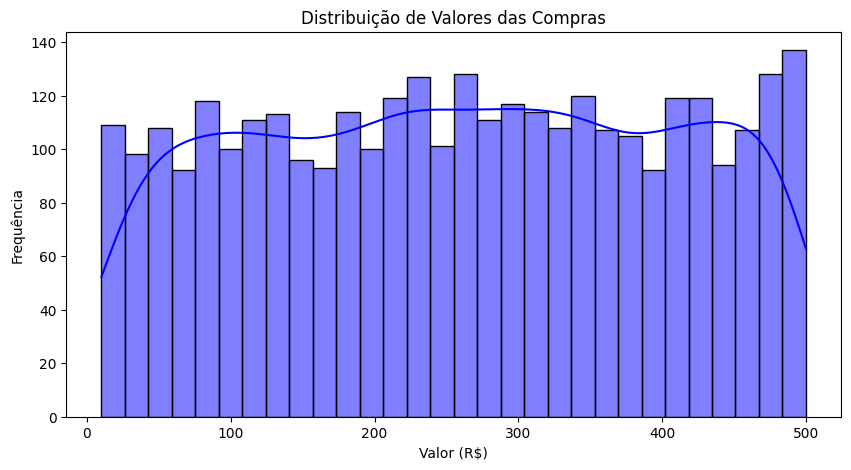

<ipython-input-3-fddb070d5a90>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Gênero', palette="pastel")


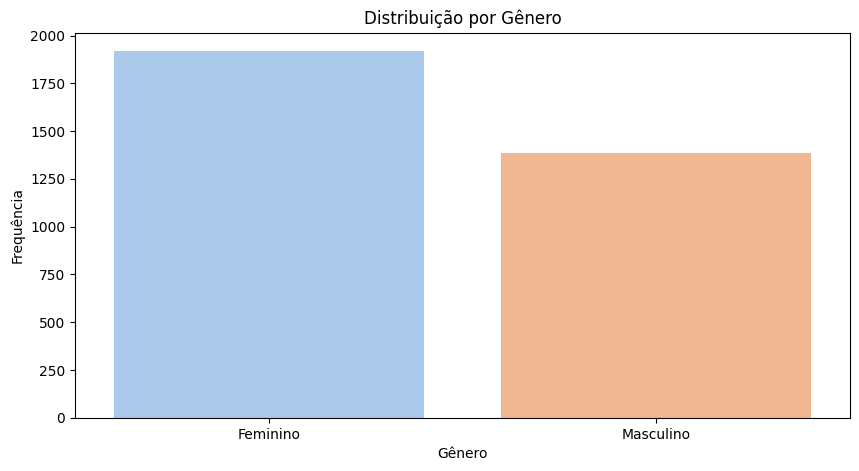

Relatório de Classificação (Sentimento):
               precision    recall  f1-score   support

           0       0.26      0.24      0.25       141
           1       0.23      0.21      0.22       141
           2       0.17      0.20      0.18       122
           3       0.15      0.14      0.15       143
           4       0.11      0.13      0.12       114

    accuracy                           0.18       661
   macro avg       0.19      0.18      0.18       661
weighted avg       0.19      0.18      0.19       661

Erro Quadrático Médio (Valor): 1.229936053700268


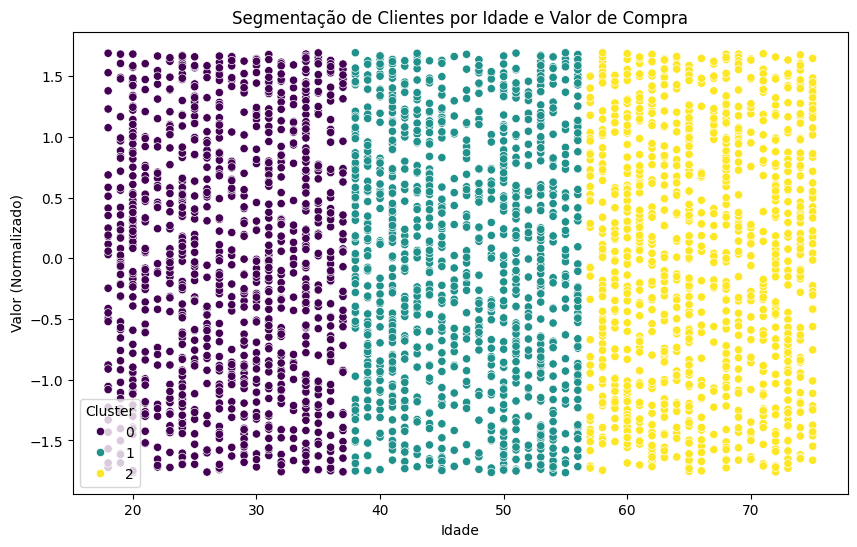

Top 5 produtos mais vendidos:
 Produto
Carteira      276
Assinatura    267
Meia          264
Chinelo       264
Camiseta      260
Name: count, dtype: int64
Distribuição de avaliações:
 Avaliacao
Neutra       678
Péssimo      675
Excelente    653
Ruim         650
Boa          649
Name: count, dtype: int64
Métodos de pagamento mais utilizados:
 Pagamento
Pix         1658
Crédito      974
Débito       505
Dinheiro     168
Name: count, dtype: int64
Distribuição de clientes por cluster:
 Cluster
1    1138
0    1135
2    1032
Name: count, dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.cluster import KMeans
from datetime import datetime, timedelta
import random

# Geração do dataset com dados distintos
n_linhas = 1000
ids = list(range(101, 101 + n_linhas))
idades = [random.randint(18, 75) for _ in range(n_linhas)]
generos = [random.choices(["Feminino", "Masculino"], weights=[0.6, 0.4])[0] for _ in range(n_linhas)]
cidades = [random.choice(["Fortaleza", "São Paulo", "Rio de Janeiro", "Salvador", "Belo Horizonte"]) for _ in range(n_linhas)]
estados = {
    "Fortaleza": "Ceará",
    "São Paulo": "São Paulo",
    "Rio de Janeiro": "Rio de Janeiro",
    "Salvador": "Bahia",
    "Belo Horizonte": "Minas Gerais",
}
produtos_variados = [
    "Tênis", "Meia", "Camiseta", "Assinatura", "Transporte", "Jaqueta",
    "Relógio", "Calça", "Boné", "Chinelo", "Óculos", "Mochila", "Carteira"
]
avaliacoes = ["Excelente", "Boa", "Neutra", "Ruim", "Péssimo"]
pagamentos = ["Pix", "Crédito", "Débito", "Dinheiro"]
pagamento_pesos = [0.5, 0.3, 0.15, 0.05]  # Pix como o método preferido

expanded_data = []
for i in range(n_linhas):
    cliente_id = ids[i]
    idade = idades[i]
    genero = generos[i]
    cidade = cidades[i]
    estado = estados[cidade]
    num_produtos = random.randint(1, min(6, len(produtos_variados)))
    produtos_comprados = random.sample(produtos_variados, num_produtos)
    valores = [round(random.uniform(10, 500), 2) for _ in produtos_comprados]
    data_inicial = datetime(2023, 1, 1)
    datas_compras = [data_inicial + timedelta(days=random.randint(0, 365)) for _ in produtos_comprados]
    avaliacoes_aleatorias = random.sample(avaliacoes, min(len(produtos_comprados), len(avaliacoes)))
    pagamentos_aleatorios = random.choices(pagamentos, weights=pagamento_pesos, k=len(produtos_comprados))

    for produto, valor, data_compra, avaliacao, pagamento in zip(
            produtos_comprados, valores, datas_compras, avaliacoes_aleatorias, pagamentos_aleatorios
    ):
        expanded_data.append({
            "ID_Cliente": cliente_id,
            "Idade": idade,
            "Gênero": genero,
            "Cidade": cidade,
            "Estado": estado,
            "Produto": produto,
            "Valor": valor,
            "Data_Compra": data_compra.strftime("%Y-%m-%d"),
            "Avaliacao": avaliacao,
            "Pagamento": pagamento
        })

# Criar o dataset e salvar em uma variável
dataset = pd.DataFrame(expanded_data)

# Análise Exploratória de Dados (EDA)
print("Resumo do Dataset:\n", dataset.head())
print("\nInformações Gerais:\n")
dataset.info()

# Produtos mais vendidos
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Produto', order=dataset['Produto'].value_counts().index)
plt.title("Distribuição de Produtos Mais Comprados")
plt.xlabel("Produto")
plt.ylabel("Quantidade de Compras")
plt.xticks(rotation=45)
plt.show()

# Distribuição de avaliações
plt.figure(figsize=(8, 4))
sns.countplot(data=dataset, x='Avaliacao', palette="viridis")
plt.title("Distribuição de Avaliações")
plt.xlabel("Avaliação")
plt.ylabel("Frequência")
plt.show()

# Distribuição por métodos de pagamento
plt.figure(figsize=(8, 4))
sns.countplot(data=dataset, x='Pagamento', palette="muted", order=dataset['Pagamento'].value_counts().index)
plt.title("Distribuição dos Métodos de Pagamento")
plt.xlabel("Método de Pagamento")
plt.ylabel("Frequência")
plt.show()

# Distribuição de valores de compra
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Valor'], kde=True, bins=30, color="blue")
plt.title("Distribuição de Valores das Compras")
plt.xlabel("Valor (R$)")
plt.ylabel("Frequência")
plt.show()

# Análise por gênero
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='Gênero', palette="pastel")
plt.title("Distribuição por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Frequência")
plt.show()

# Preparação dos Dados
encoder = LabelEncoder()
dataset['Produto_Encoded'] = encoder.fit_transform(dataset['Produto'])
dataset['Pagamento_Encoded'] = encoder.fit_transform(dataset['Pagamento'])
dataset['Gênero_Encoded'] = encoder.fit_transform(dataset['Gênero'])
scaler = StandardScaler()
dataset['Valor_Scaled'] = scaler.fit_transform(dataset[['Valor']])

X = dataset[['Idade', 'Gênero_Encoded', 'Produto_Encoded', 'Pagamento_Encoded']]
y_sentimento = encoder.fit_transform(dataset['Avaliacao'])
y_valor = dataset['Valor_Scaled']

# Classificação (Previsão de Sentimento)
X_train, X_test, y_train, y_test = train_test_split(X, y_sentimento, test_size=0.2, random_state=42)
model_sentimento = RandomForestClassifier(random_state=42)
model_sentimento.fit(X_train, y_train)
y_pred = model_sentimento.predict(X_test)
print("Relatório de Classificação (Sentimento):\n", classification_report(y_test, y_pred))

# Regressão (Previsão de Valor)
X_train, X_test, y_train, y_test = train_test_split(X, y_valor, test_size=0.2, random_state=42)
model_valor = RandomForestRegressor(random_state=42)
model_valor.fit(X_train, y_train)
y_pred = model_valor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (Valor): {mse}")

# Clusterização (Segmentação de Clientes)
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Idade', y='Valor_Scaled', hue='Cluster', palette='viridis')
plt.title("Segmentação de Clientes por Idade e Valor de Compra")
plt.xlabel("Idade")
plt.ylabel("Valor (Normalizado)")
plt.show()

# Insights Detalhados
# Produtos mais vendidos
print("Top 5 produtos mais vendidos:\n", dataset['Produto'].value_counts().head())

# Análise de avaliações
print("Distribuição de avaliações:\n", dataset['Avaliacao'].value_counts())

# Métodos de pagamento mais utilizados
print("Métodos de pagamento mais utilizados:\n", dataset['Pagamento'].value_counts())

# Segmentação de clientes
print("Distribuição de clientes por cluster:\n", dataset['Cluster'].value_counts())

# Potenciais Insights:
# - Produtos mais populares: Oferecer promoções nos produtos mais vendidos.
# - Avaliações negativas: Melhorar os produtos que recebem "Ruim" ou "Péssimo".
# - Gêneros e idades predominantes: Criar produtos ou promoções direcionadas para o público principal.
# - Métodos de pagamento mais usados: Investir em infraestrutura para os métodos preferidos pelos clientes.
# - Segmentos: Personalizar ofertas para cada cluster identificado nos dados.
